In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import segysak
from segysak import open_seisnc, segy

from src.definitions import ROOT_DIR
from src.data.utils import head, line_count


/home/pinto/miniconda3/envs/gsh_py_gp/lib/python3.10/site-packages/segysak/segy/_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
%matplotlib ipympl

# Load seismic

In [4]:
# Downloaded files directory
dst_dir = ROOT_DIR / "data"
seisnc_path = dst_dir / "interim/R3136_15UnrPrDMkD_Full_D_Rzn_RMO_Shp_vG.seisnc"

In [5]:
seisnc = open_seisnc(seisnc_path, chunks={"inline": 100})

# Load horizons

In [6]:
horizon_paths = {
    "RNRO1_T": "external/groningen/Horizon_Interpretation/DCAT201605_R3136_RNRO1_T_pk_depth",
    "RO_T": "external/groningen/Horizon_Interpretation/RO____T",
}

In [7]:
col_names = ["inline", "xline", "easting", "northing", "depth"]

horizons = {}
for horizon_name, horizon_path in horizon_paths.items():
    horizon_full_path = dst_dir / horizon_path
    horizons[horizon_name] = pd.read_csv(horizon_full_path, sep=r"\s+", header=None, names=col_names)

# Get Salt isochore

In [8]:
# Map horizon to seismic grid and fill in missing data (convex hull)
rnr01_t_mapped = seisnc.seis.surface_from_points(
    horizons['RNRO1_T'],
    "depth",
    left=("cdp_x", "cdp_y"),
    right=("easting", "northing")
)

In [9]:
rnr01_t_mapped

<xarray.Dataset>
Dimensions:  (iline: 1961, xline: 2181)
Coordinates:
  * iline    (iline) uint16 7740 7741 7742 7743 7744 ... 9697 9698 9699 9700
  * xline    (xline) uint16 7570 7571 7572 7573 7574 ... 9747 9748 9749 9750
    depth    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
    cdp_x    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>
    cdp_y    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>
Data variables:
    *empty*
Attributes: (12/13)
    sample_rate:         8.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2019.4 Saturday, Decembe...
    measurement_system:  m
    source_file:         R3136_15UnrPrDMkD_Full_D_Rzn_RMO_Shp_vG.SEGY
    percentiles:         [0. 0. 0. 0. 0. 0. 0.]
    coord_scalar:        -100.0
    ...                  ...
    d3_domain:           None
    epsg:                None
    corner_points:       None
    corner_points_xy:    None
    srd:                 None
    datatype:            None

In [10]:
ro_t_mapped = seisnc.seis.surface_from_points(
    horizons['RO_T'],
    "depth",
    left=("cdp_x", "cdp_y"),
    right=("easting", "northing")
)

In [11]:
ro_t_mapped

<xarray.Dataset>
Dimensions:  (iline: 1961, xline: 2181)
Coordinates:
  * iline    (iline) uint16 7740 7741 7742 7743 7744 ... 9697 9698 9699 9700
  * xline    (xline) uint16 7570 7571 7572 7573 7574 ... 9747 9748 9749 9750
    depth    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
    cdp_x    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>
    cdp_y    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>
Data variables:
    *empty*
Attributes: (12/13)
    sample_rate:         8.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2019.4 Saturday, Decembe...
    measurement_system:  m
    source_file:         R3136_15UnrPrDMkD_Full_D_Rzn_RMO_Shp_vG.SEGY
    percentiles:         [0. 0. 0. 0. 0. 0. 0.]
    coord_scalar:        -100.0
    ...                  ...
    d3_domain:           None
    epsg:                None
    corner_points:       None
    corner_points_xy:    None
    srd:                 None
    datatype:            None

In [12]:
rnr01_t_mapped.depth

<xarray.DataArray 'depth' (iline: 1961, xline: 2181)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * iline    (iline) uint16 7740 7741 7742 7743 7744 ... 9697 9698 9699 9700
  * xline    (xline) uint16 7570 7571 7572 7573 7574 ... 9747 9748 9749 9750
    depth    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
    cdp_x    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>
    cdp_y    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>

In [13]:
salt_isochore = ro_t_mapped.depth - rnr01_t_mapped.depth

In [14]:
salt_isochore

<xarray.DataArray 'depth' (iline: 1961, xline: 2181)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * iline    (iline) uint16 7740 7741 7742 7743 7744 ... 9697 9698 9699 9700
  * xline    (xline) uint16 7570 7571 7572 7573 7574 ... 9747 9748 9749 9750
    cdp_x    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>
    cdp_y    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>

In [15]:
inl_sel = 9100

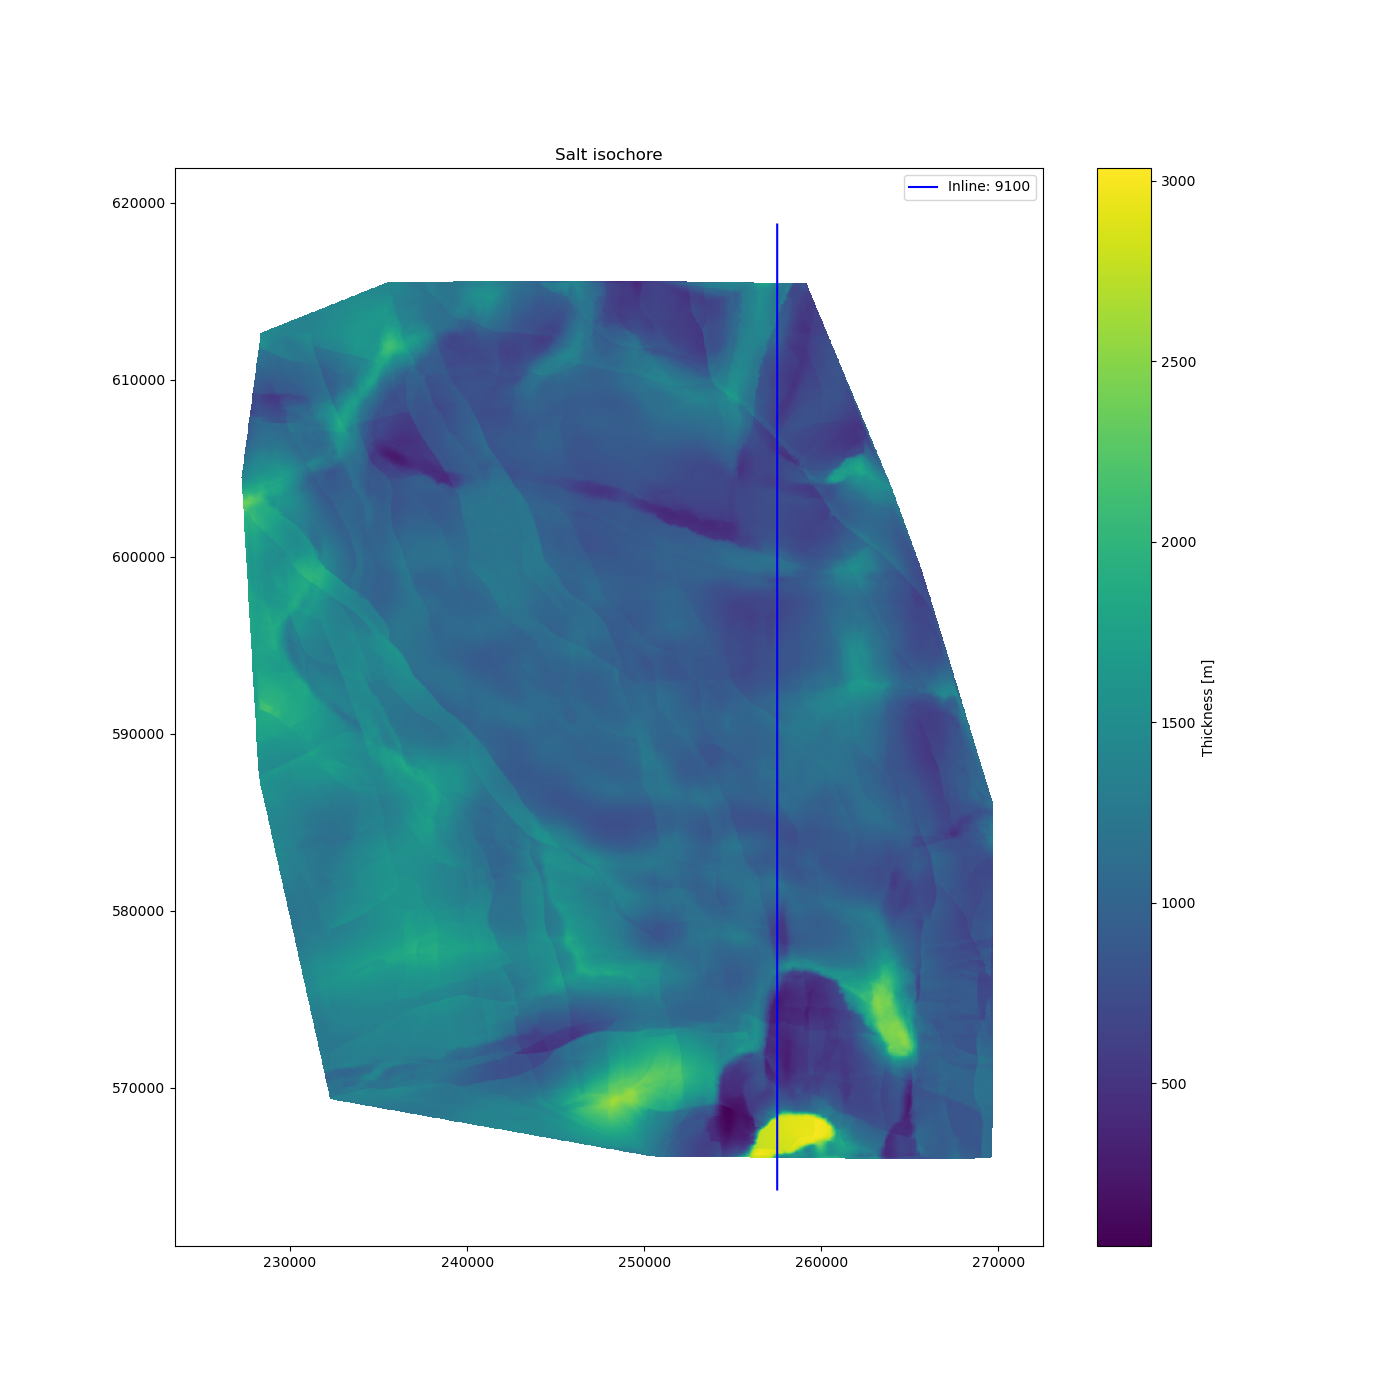

In [16]:
f, ax = plt.subplots(figsize=(14, 14))
pp = ax.pcolormesh(salt_isochore.cdp_x, salt_isochore.cdp_y, salt_isochore.values, cmap="viridis")
f.colorbar(pp, label="Thickness [m]")
ax.axis("equal")
ax.set_title("Salt isochore")

# Plot selected inline
selected_inline = seisnc.data.sel(iline=inl_sel)
ax.plot(
    selected_inline.cdp_x,
    selected_inline.cdp_y,
    color="blue",
    label=f"Inline: {inl_sel}"
)
ax.axis("equal")
ax.legend()

In [17]:
halite_vp = 4400 # m/s
anhydrite_vp = 5900 # m/s

anhydrite_perc = 0.2
salt_vp_reference = (halite_vp*(1-anhydrite_perc) + anhydrite_vp*anhydrite_perc) 

In [18]:
salt_vp_reference

4700.0

In [19]:
salt_isochrone_reference = salt_isochore.copy()
salt_isochrone_reference.values = salt_isochore.values / salt_vp_reference # seconds

In [20]:
anhydrite_perc = 0.05
salt_vp_update = (halite_vp*(1-anhydrite_perc) + anhydrite_vp*anhydrite_perc)

In [21]:
salt_vp_update

4475.0

In [22]:
ro_t_update = rnr01_t_mapped.depth.copy()
ro_t_update.values = ro_t_update.values + salt_isochrone_reference.values * salt_vp_update

In [23]:
ro_t_update

<xarray.DataArray 'depth' (iline: 1961, xline: 2181)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * iline    (iline) uint16 7740 7741 7742 7743 7744 ... 9697 9698 9699 9700
  * xline    (xline) uint16 7570 7571 7572 7573 7574 ... 9747 9748 9749 9750
    depth    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
    cdp_x    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>
    cdp_y    (iline, xline) float32 dask.array<chunksize=(1961, 2181), meta=np.ndarray>

In [24]:
ro_t_update_trace = ro_t_update.sel(iline=inl_sel)

In [25]:
np.nanmax(ro_t_update_trace)

3286.8907668118354

In [26]:
horizon_trace = {}
for horizon_name, horizon in horizons.items():
    # if horizon_name != "RNRO1_T":
    #     continue
    is_inline = horizon["inline"] == inl_sel
    horizon_trace[horizon_name] = horizon.loc[is_inline, :]

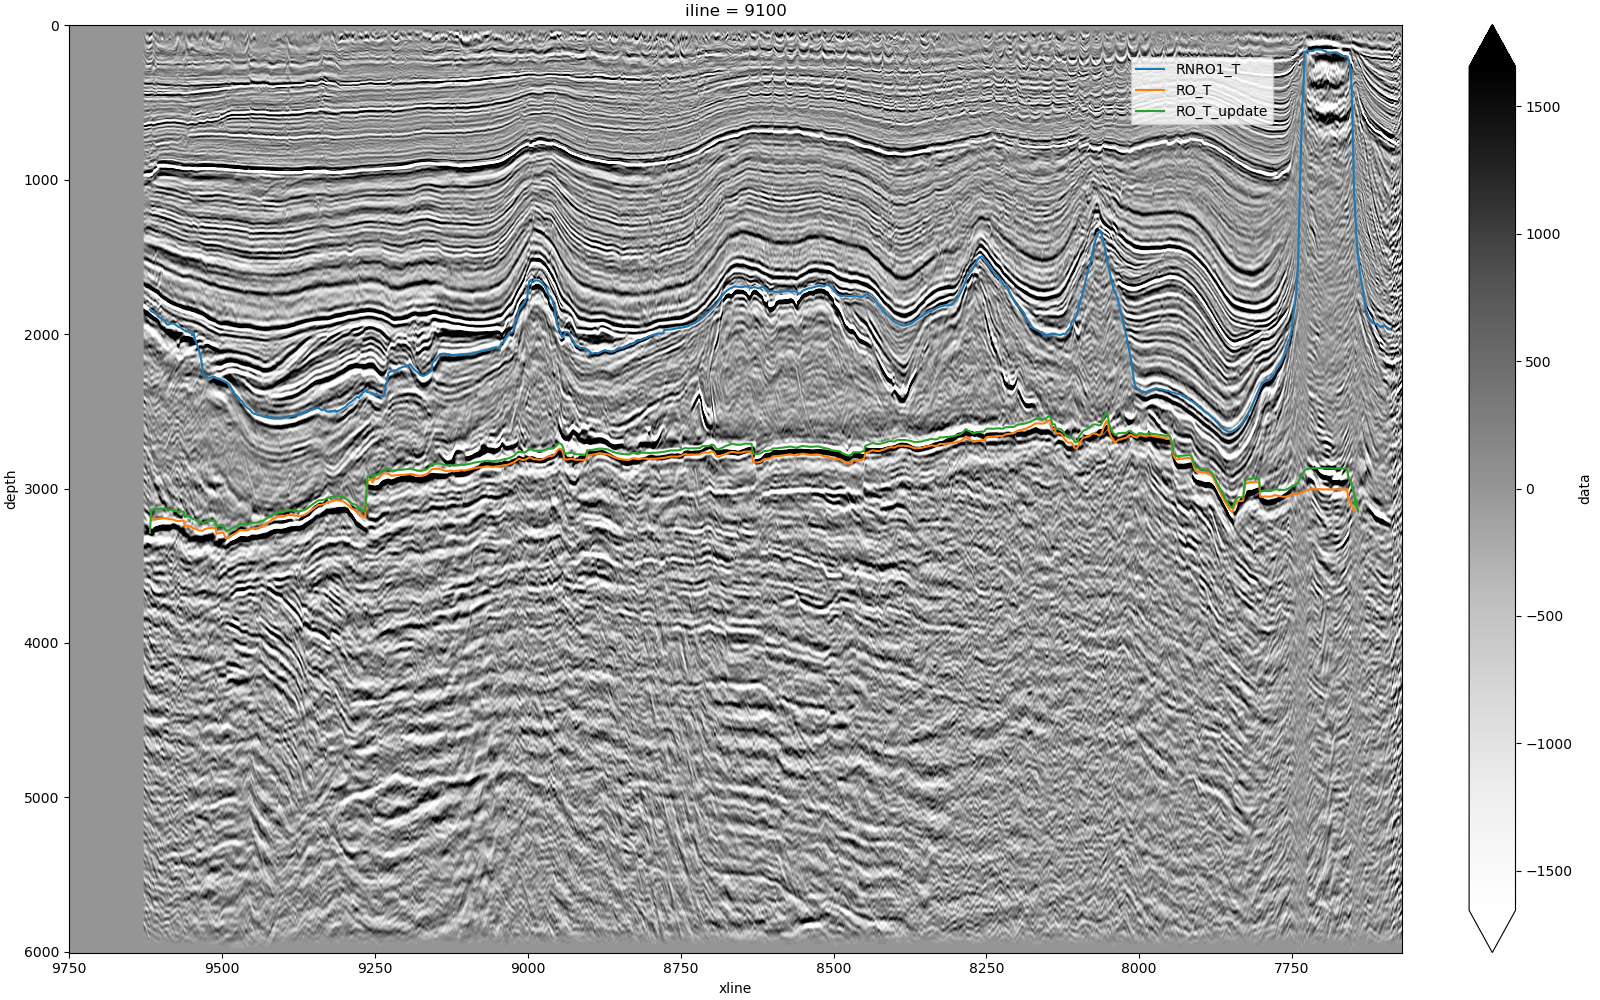

In [27]:
opt = dict(
    x="xline",
    y="depth",
    add_colorbar=True,
    interpolation="spline16",
    robust=True,
    yincrease=False,
    cmap="Greys",
)

f, ax = plt.subplots(figsize=(16, 10), constrained_layout=True)

seisnc.data.sel(iline=inl_sel, depth=slice(000, 6000)).plot.imshow(ax=ax, **opt)

artists = []
for horizon_name, horizon in horizon_trace.items():
    artist, = ax.plot(horizon["xline"], horizon["depth"], label=horizon_name)
    artists.append(artist)

ax.plot(ro_t_update_trace.xline, ro_t_update_trace.values, label="RO_T_update")

ax.invert_xaxis()
f.legend(bbox_to_anchor=(0.8, 0.95), bbox_transform=f.transFigure)
# f.legend(handles=artists, bbox_to_anchor=(0.8, 0.95), bbox_transform=f.transFigure)

In [ ]:
anhydrite_percs = [perc/100 for perc in range(5, 33, 1)]

# Load horizons

In [ ]:
horizon_paths = {
    "RNRO1_T": "external/groningen/Horizon_Interpretation/DCAT201605_R3136_RNRO1_T_pk_depth",
    "RNRO1_T_time": "external/groningen/Horizon_Interpretation/DCAT201605_R3136_RNRO1_T_pk_t",
    "ZE_T": "external/groningen/Horizon_Interpretation/DCAT201605_R3136_ZE_T_na_depth",
    "RO_T": "external/groningen/Horizon_Interpretation/RO____T",
}

In [ ]:
col_names = ["inline", "xline", "easting", "northing", "depth"]

horizons = {}
for horizon_name, horizon_path in horizon_paths.items():
    horizon_full_path = dst_dir / horizon_path
    horizons[horizon_name] = pd.read_csv(horizon_full_path, sep=r"\s+", header=None, names=col_names)

In [ ]:
# Map horizon to seismic grid and fill in missing data (convex hull)
hrz_mapped = seisnc.seis.surface_from_points(horizons['RO_T'], "depth", left=("cdp_x", "cdp_y"), right=("easting", "northing"))

In [ ]:
f, axs = plt.subplots(nrows=2, figsize=(16, 16))

axs[0].pcolormesh(hrz_mapped.cdp_x, hrz_mapped.cdp_y, hrz_mapped.depth, vmin=2500, vmax=3500, cmap="viridis_r")
axs[0].scatter(line_x, line_y, color="r")
axs[0].axis("equal")
axs[1].pcolormesh(X, Y, Z, vmin=2500, vmax=3500, cmap="viridis_r")
axs[1].axis("equal")